In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os


mysql_url = os.environ["MYSQL_URI"]

# Connexion à la base de données
engine = create_engine("mysql+pymysql://root:${MYSQL_ROOT_PASSWORD}@db:3306/online_shop")

In [7]:

# Requête SQL pour extraire les données
query = """
SELECT o.OrderDate, o.Sales, c.CategoryName
FROM Orders o
JOIN Products p ON o.ProductID = p.ProductID
JOIN SubCategories sc ON p.SubCategoryID = sc.SubCategoryID
JOIN Categories c ON sc.CategoryID = c.CategoryID
"""
# Charger les données dans un DataFrame
df = pd.read_sql(query, engine)

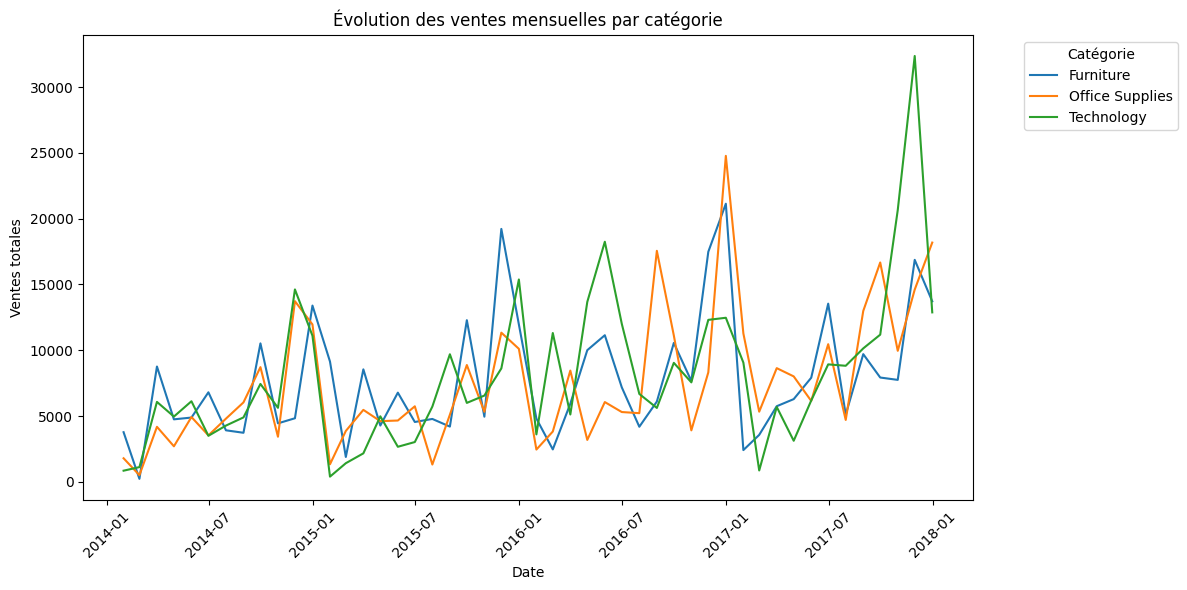

In [8]:

# Convertir OrderDate en datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Grouper les données par mois et catégorie
monthly_sales = df.groupby([pd.Grouper(key='OrderDate', freq='M'), 'CategoryName'])['Sales'].sum().reset_index()

# Créer un graphique de l'évolution des ventes par catégorie
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='OrderDate', y='Sales', hue='CategoryName')
plt.title("Évolution des ventes mensuelles par catégorie")
plt.xlabel("Date")
plt.ylabel("Ventes totales")
plt.xticks(rotation=45)
plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()